#A classification analysis on suicide data

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


!pip install scikit-plot #manual install package by ap
import scikitplot as skplt #uncommented need during comparision

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



Importing the original suicide data set and renaming the columns

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
suicide_data= pd.read_csv(io.BytesIO(uploaded['master.csv']))


Saving master.csv to master.csv


In [ ]:
#Renaming columns
suicide_data.columns = ['country', 'year', 'sex', 'age', 'suicide_no', 'population','suicide_per_100k',
                       'country_year', 'yearly_hdi', 'gdp_per_year', 'gdp_per_capita', 'generation']
suicide_data.columns


Index(['country', 'year', 'sex', 'age', 'suicide_no', 'population',
       'suicide_per_100k', 'country_year', 'yearly_hdi', 'gdp_per_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [ ]:
suicide_data.head()

,country,year,sex,age,suicide_no,population,suicide_per_100k,country_year,yearly_hdi,gdp_per_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
#As you can see, most of the HDIForYear value is empty. That's why I want this value deleted.
suicide_data=suicide_data.drop(['yearly_hdi','country_year'],axis=1)

In [ ]:
suicide_data.columns

Index(['country', 'year', 'sex', 'age', 'suicide_no', 'population',
       'suicide_per_100k', 'gdp_per_year', 'gdp_per_capita', 'generation'],
      dtype='object')

In [ ]:
#Describe function includes analysis of all our numerical data. For this, count, mean, std, min,% 25,% 50,% 75, max values are given.

suicide_data.head()

,country,year,sex,age,suicide_no,population,suicide_per_100k,gdp_per_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


Importing the suicide data set with extra features added from WDI database to enrich our the data set by adding more features.

In [ ]:
uploaded = files.upload()
extra_data= pd.read_csv(io.BytesIO(uploaded['suicidedataextrafestures.csv']))

Saving suicidedataextrafestures.csv to suicidedataextrafestures.csv


In [ ]:
extra_data.columns = [
    'country', 'year', 'sex', 'age', 'suicide_no', 'population','suicide_per_100k', 'country_year', 'yearly_hdi',
    'gdp_per_year', 'gdp_per_capita', 'generation', 'suicide%', 'internet_users', 'expenses', 'employee_compensation',
    'unemployment', 'physicians_per_1000', 'legal_rights', 'labor_force_total', 'life_expectancy', 'mobile_subscriptions_per_100',
    'refugee', 'self_employed', 'electricity_access', 'secondary_completion']

extra_data.head()

,country,year,sex,age,suicide_no,population,suicide_per_100k,country_year,yearly_hdi,gdp_per_year,gdp_per_capita,generation,suicide%,internet_users,expenses,employee_compensation,unemployment,physicians_per_1000,legal_rights,labor_force_total,life_expectancy,mobile_subscriptions_per_100,refugee,self_employed,electricity_access,secondary_completion
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,3264,G.I. Generation,0.055647,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,3264,G.I. Generation,0.024286,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,3264,Silent,0.012372,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,3264,G.I. Generation,0.009115,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,3264,Boomers,0.007922,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
extra_data=extra_data.drop(['yearly_hdi','country_year'],axis=1)

In [ ]:
extra_data.head()

,country,year,sex,age,suicide_no,population,suicide_per_100k,gdp_per_year,gdp_per_capita,generation,suicide%,internet_users,expenses,employee_compensation,unemployment,physicians_per_1000,legal_rights,labor_force_total,life_expectancy,mobile_subscriptions_per_100,refugee,self_employed,electricity_access,secondary_completion
0,Argentina,1985,male,75+ years,202,363000,55.65,8.841667e+10,3264,G.I. Generation,0.055647,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Argentina,1985,male,55-74 years,485,1997000,24.29,8.841667e+10,3264,G.I. Generation,0.024286,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,8.841667e+10,3264,Silent,0.012372,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Argentina,1985,female,55-74 years,210,2304000,9.11,8.841667e+10,3264,G.I. Generation,0.009115,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,1985,male,25-34 years,177,2234200,7.92,8.841667e+10,3264,Boomers,0.007922,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# To find the unique contries in extra_data
pd.unique(suicide_data['country'])


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '


The original data set contains data from more than 100 countries so I've decided to limit the number of countries to make the analysis more insightful and chose 40 countries from different parts of the world that I believe are a good sample of the different regions.

In [ ]:
countrynames = [
    'Argentina',
    'Armenia',
    'Australia',
    'Austria',
    'Belgium',
    'Brazil',
    'Bulgaria',
    'Canada',
    'Chile',
    'Colombia',
    'Croatia',
    'Cuba',
    'Czech Republic',
    'Denmark',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Ireland',
    'Israel',
    'Italy',
    'Japan',
    'Mexico',
    'Netherlands',
    'New Zealand',
    'Norway',
    'Poland',
    'Portugal',
    'Romania',
    'Russian Federation',
    'South Africa',
    'Spain',
    'Sweden',
    'Switzerland',
    'Thailand', 
    'Turkmenistan',
    'Ukraine',
    'United Kingdom', 
    'United States']

In [ ]:
suicide_data.shape

(27820, 10)

In [ ]:
extra_data.shape

(15110, 24)

In [ ]:
suicide_data_rate=suicide_data.groupby(['country','sex']).suicide_no.sum()
suicide_data_rate

country              sex   
Albania              female       693
                     male        1277
Antigua and Barbuda  female         1
                     male          10
Argentina            female     18326
                                ...  
United States        male      820216
Uruguay              female      2820
                     male       10318
Uzbekistan           female      9260
                     male       25543
Name: suicide_no, Length: 202, dtype: int64

In [ ]:
extra_data_rate=extra_data.groupby(['country','sex']).suicide_no.sum()
extra_data_rate

country         sex   
Argentina       female     18326
                male       63893
Armenia         female       495
                male        1410
Australia       female     15326
                           ...  
United Kingdom  male      104118
United States   female    213797
                male      820216
Uzbekistan      female      9260
                male       25543
Name: suicide_no, Length: 96, dtype: int64

In [ ]:
suicide_data.groupby('age')['sex'].count()

age
15-24 years    4642
25-34 years    4642
35-54 years    4642
5-14 years     4610
55-74 years    4642
75+ years      4642
Name: sex, dtype: int64

In [ ]:
extra_data.groupby('age')['sex'].count()

age
15-24 years    2522
25-34 years    2522
35-54 years    2522
5-14 years     2500
55-74 years    2522
75+ years      2522
Name: sex, dtype: int64

# Data Analysis

In [ ]:
#Also, the extra data from the WDI database was only available for 1995-2013, so I decided to limit the data to this time period
#ap
df1 = extra_data.copy()
df = df1.iloc[np.where(df1.country == countrynames[0])]
for i, x in enumerate(countrynames[1:]):
    df = df.append(df1.iloc[np.where(df1.country == x)])

df = df[df.year >= 1995]
df = df[df.year <= 2013]

Text(0.5, 0, 'Suicides per 100K')

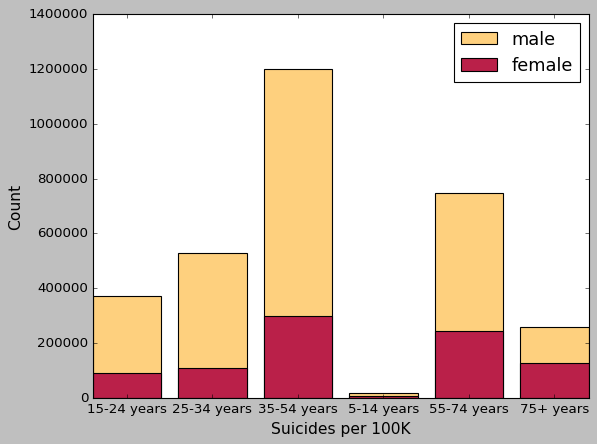

In [ ]:
col = plt.cm.Spectral(np.linspace(0, 1, 20)) #ap
plt.figure(figsize=(8, 6))

agedistf = pd.DataFrame(df.groupby('sex').get_group('female').groupby('age').suicide_no.sum())

agedistm = pd.DataFrame(df.groupby('sex').get_group('male').groupby('age').suicide_no.sum())

plt.bar(agedistm.index, agedistm.suicide_no, color=col[7])
plt.bar(agedistf.index, agedistf.suicide_no, color=col[1])
plt.legend(['male', 'female'], fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Suicides per 100K', fontsize=14)

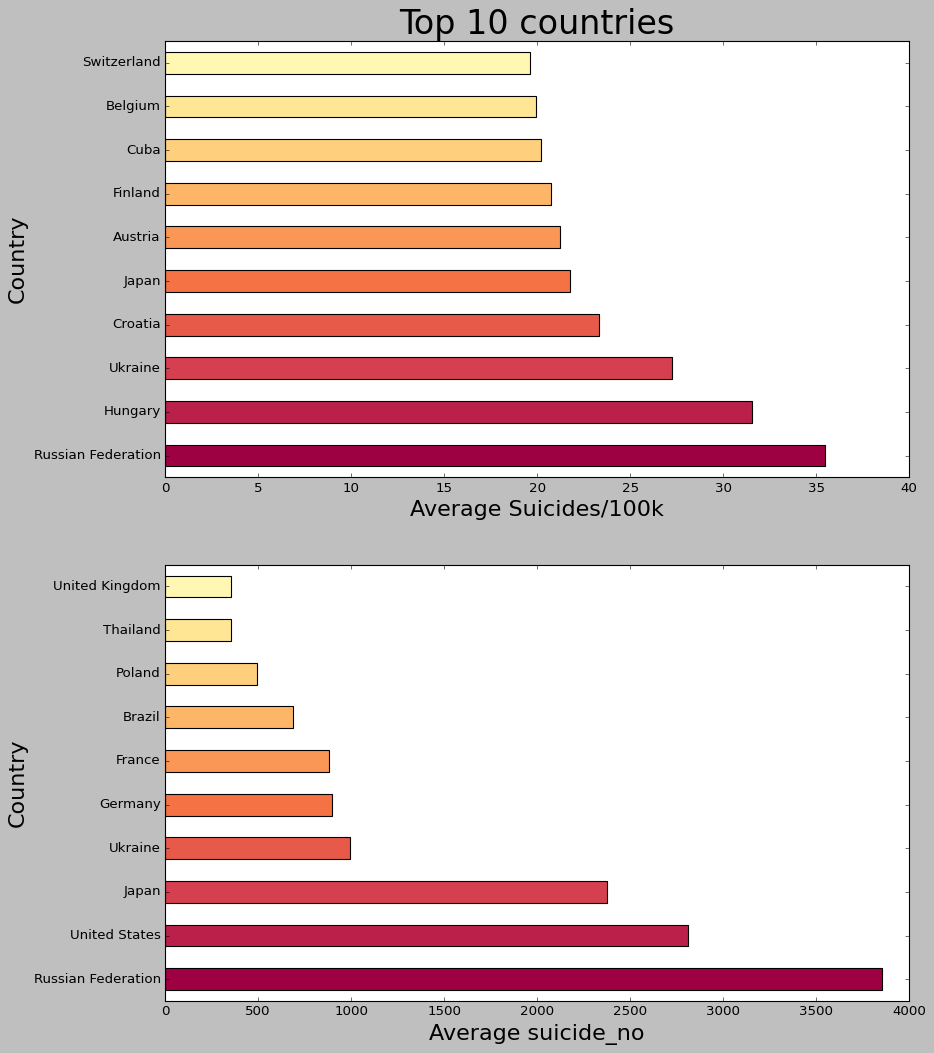

In [ ]:
plt.figure(figsize=(12, 15))

plt.subplot(211)
df.groupby(['country']).suicide_per_100k.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries', fontsize=30)

plt.subplot(212)
df.groupby(['country']).suicide_no.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average suicide_no', size=20)
plt.ylabel('Country', fontsize=20);

In [ ]:
# from google.colab import drive  #no need
# drive.mount('/content/drive')

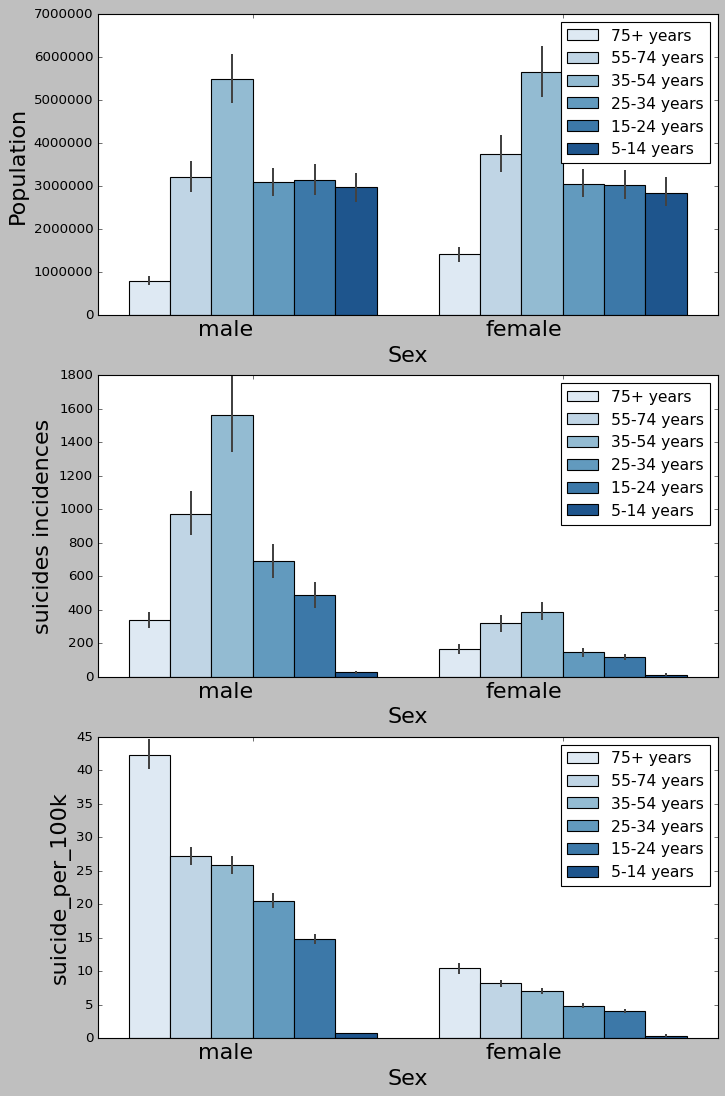

In [ ]:
plt.figure(figsize=(10, 16))

plt.subplot(311)

sns.barplot(x='sex', y='population', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14, loc='best')

plt.subplot(313)

sns.barplot(x='sex', y='suicide_per_100k', hue='age', data=df,palette="Blues")
plt.xticks(ha='right', fontsize=20);
plt.ylabel('suicide_per_100k',fontsize=20);
plt.xlabel('Sex',fontsize=20);
plt.legend(fontsize=14);

plt.subplot(312)
sns.barplot(x='sex', y='suicide_no', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides incidences', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14)

Text(0, 0.5, 'Total number of suicides in the world')

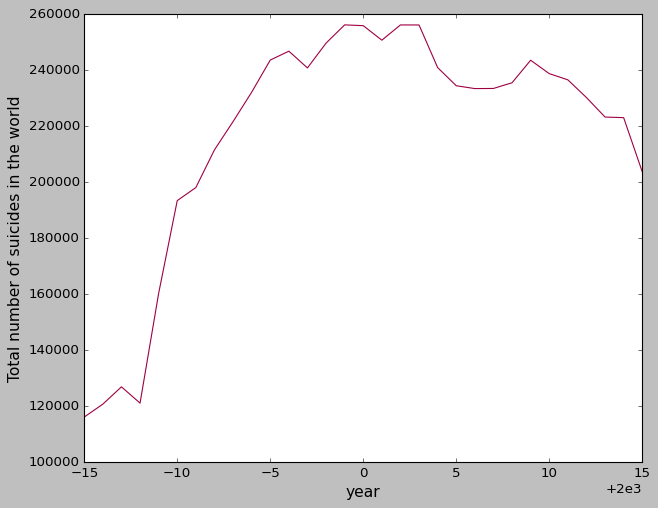

In [ ]:
year = suicide_data.groupby('year').year.unique()

plt.figure(figsize=(9, 7))
plt.style.use('classic')
totalpyear = pd.DataFrame(suicide_data.groupby('year').suicide_no.sum())

plt.plot(year.index[0:31], totalpyear[0:31], color=col[0])
plt.xlabel('year', fontsize=14)
plt.ylabel('Total number of suicides in the world', fontsize=14)

Text(0, 0.5, 'Total number of suicides in the world')

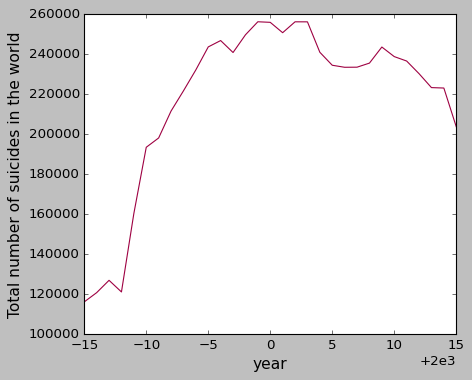

In [ ]:
year = suicide_data.groupby('year').year.unique()

plt.figure(figsize=(6, 5))

totalpyear = pd.DataFrame(suicide_data.groupby('year').suicide_no.sum())

plt.plot(year.index[0:31], totalpyear[0:31], color=col[0])
plt.xlabel('year', fontsize=14)
plt.ylabel('Total number of suicides in the world', fontsize=14)

Text(0, 0.5, 'count')

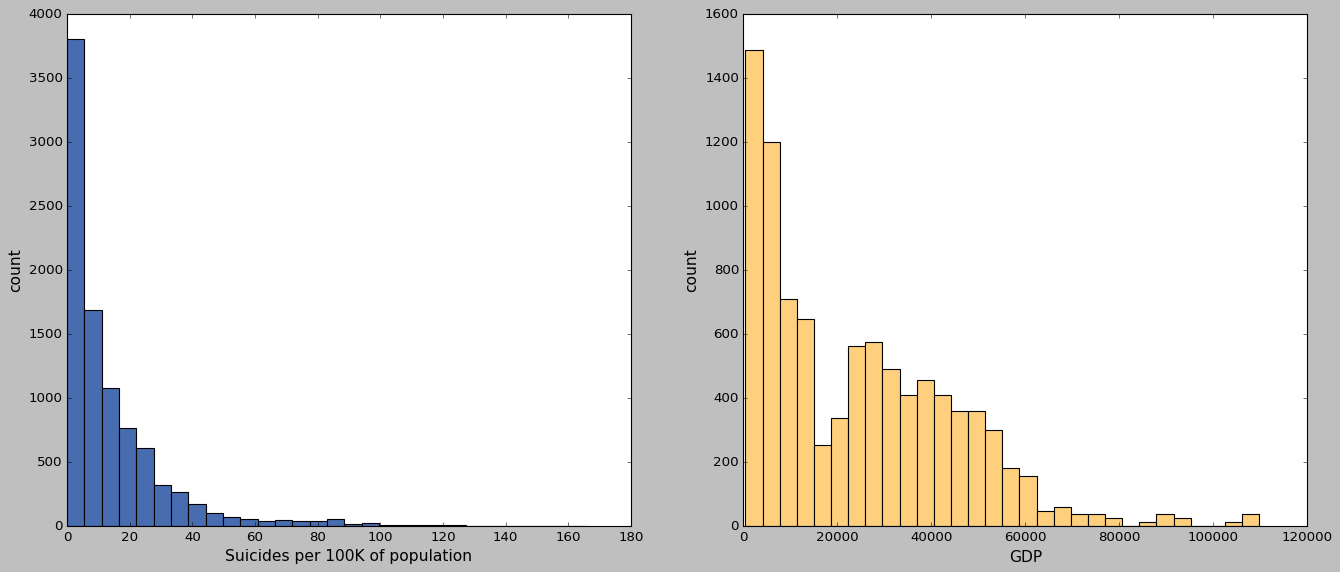

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.hist(df.suicide_per_100k, bins=30, color=col[18])
plt.xlabel('Suicides per 100K of population', fontsize=14)
plt.ylabel('count', fontsize=14)

plt.subplot(122)
plt.hist(df.gdp_per_capita, bins=30, color=col[7])
plt.xlabel('GDP', fontsize=14)
plt.ylabel('count', fontsize=14)

From all the extra features added from the WDI database, I'm using 11 features for exploring. These are basically the features with fewer null values.

totalfeatures: 
'country', 'year','gdp_per_year','gdp_per_capita','employee_compensation','unemployment',
 'life_expectancy','refugee','self_employed','internet_users','population'.
      
 I'm aslo lifting the fine subsample level of sex and age group. I'm creating a new pandas data frame "total", with a new column "suicides" as the total value of Suicides per 100k of population per country per year, calculated by summing over both sexes and age groups.

In [ ]:
features = ['country', 'year', 'gdp_per_year', 'gdp_per_capita', 'employee_compensation', 'unemployment',
            'life_expectancy', 'refugee', 'self_employed', 'internet_users']
 
 
groupbycountry_Argentina=df[features].groupby('country').get_group(countrynames[0])
groupbyyear_Argentina=groupbycountry_Argentina.groupby('year').mean()
 
total = groupbyyear_Argentina
 
suicidegroupbycountry_Argentina = df[['country', 'year', 'suicide_per_100k']].groupby('country').get_group(countrynames[0])
suicidegroupbyyear_Argentina = suicidegroupbycountry_Argentina.groupby('year').sum()
 
total['Suicides'] = suicidegroupbyyear_Argentina
 
populationgroupbycountry_Argentina = df[['country', 'year', 'population']].groupby('country').get_group(countrynames[0])
populationgroupbyyear_Argentina=populationgroupbycountry_Argentina.groupby('year').sum()
 
total['population'] = populationgroupbyyear_Argentina
 
total['country'] = countrynames[0]
 
for i, x in enumerate(countrynames[1:]):
 
    groupbycountry = df[features].groupby('country').get_group(x)
    groupbyyear = groupbycountry.groupby('year').mean()
    
    suicides = groupbyyear
    
    suicidegroupbycountry=df[['country', 'year', 'suicide_per_100k']].groupby('country').get_group(x)
    suicidegroupbyyear=suicidegroupbycountry.groupby('year').sum()
    
    suicides['Suicides'] = suicidegroupbyyear
 
    populationgroupbycountry=df[['country', 'year', 'population']].groupby('country').get_group(x)
    populationgroupbyyear=populationgroupbycountry.groupby('year').sum()
    
    total['population'] = populationgroupbyyear
  
    suicides['country'] = x
    total = total.append(suicides)
 
total.reset_index(inplace=True)
sort = True



In [ ]:
totalfeatures = ['country', 'year', 'gdp_per_year', 'gdp_per_capita', 'employee_compensation', 'unemployment',
                 'life_expectancy', 'refugee', 'self_employed', 'internet_users', 'population']

Text(0.5, 0, 'GDP')

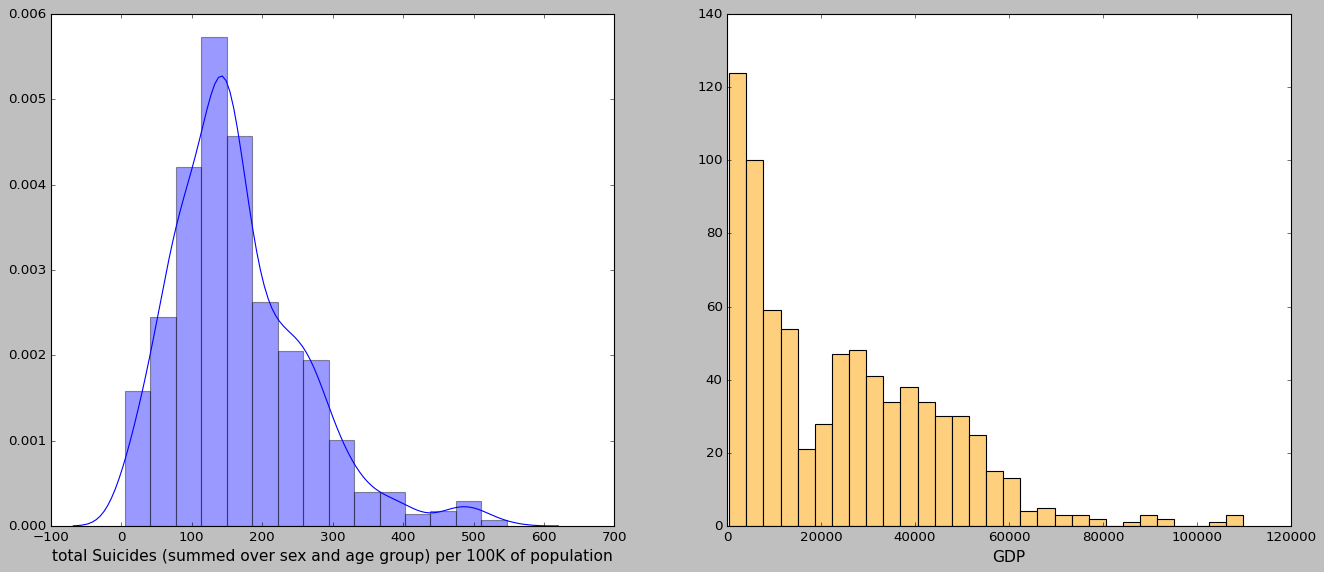

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.distplot(total.Suicides, bins=15)
plt.xlabel('total Suicides (summed over sex and age group) per 100K of population', fontsize=14)

plt.subplot(122)
plt.hist(total.gdp_per_capita, bins=30, color=col[7])
plt.xlabel('GDP', fontsize=14)

Text(0.5, 0, 'year')

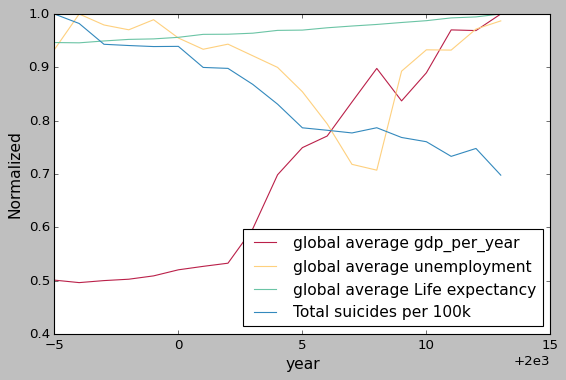

In [ ]:
plt.figure(figsize=(8, 5))

suicides = df[['year', 'gdp_per_year', 'self_employed', 'unemployment', 'life_expectancy']].groupby('year').mean()
suicides['Suicides'] = df[['country', 'year', 'suicide_per_100k']].groupby('year').sum()

plt.plot(suicides.index, suicides.gdp_per_year/suicides.gdp_per_year.max(), color=col[1])
plt.plot(suicides.index, suicides.unemployment/suicides.unemployment.max(), color=col[7])
plt.plot(suicides.index, suicides.life_expectancy/suicides.life_expectancy.max(), color=col[15])
plt.plot(suicides.index, suicides.Suicides/suicides.Suicides.max(), color=col[17])
plt.legend(['global average gdp_per_year', 'global average unemployment', 'global average Life expectancy', 'Total suicides per 100k'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)

# Correlations
# Calculating the correlation matrix for all chosen features:

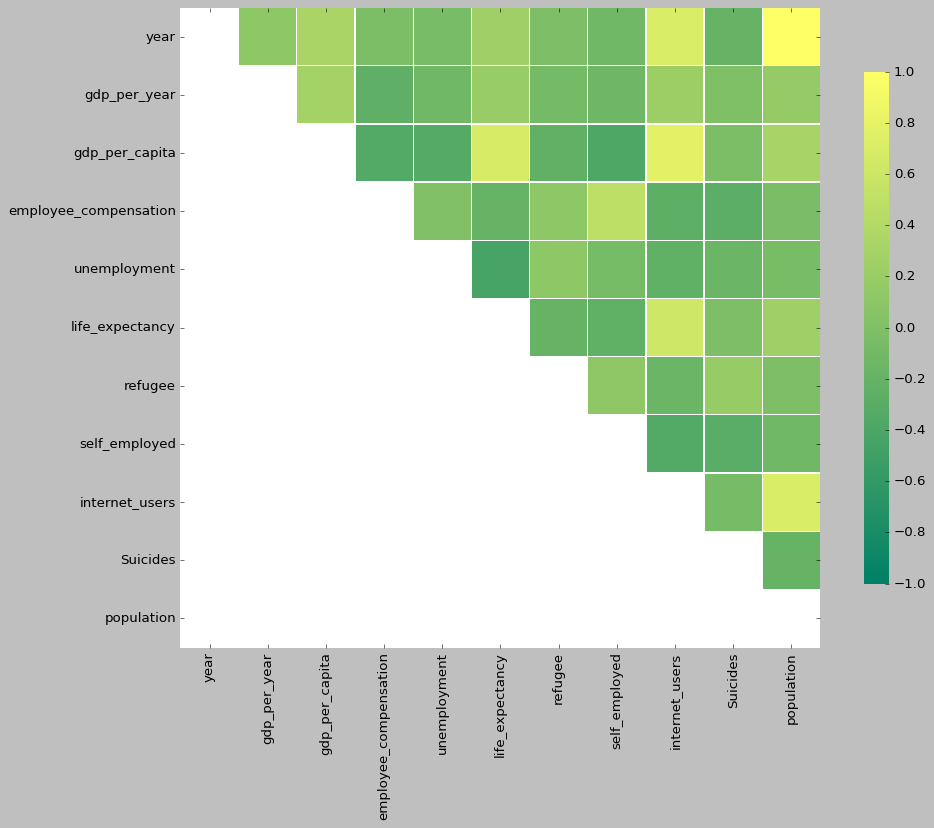

In [ ]:
corr = total.corr()

# Generate a mask for the * triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 10))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='summer', vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.2, cbar_kws={"shrink": 0.8});

The feature "internet_users" is strongly correlated with GDP features, as expected. "life_expectancy" also shows strong corrlaiton with GDP per capital. This should be noted when evaluating feature importances from model outputs. Other features do not show strong correlations.

# Data preprocessing 
Checking for null values and replacing them with mean values



In [ ]:
#checking the sum of nan values in each column
total.isnull().sum()

year                       0
gdp_per_year               0
gdp_per_capita             0
employee_compensation    100
unemployment               0
life_expectancy            0
refugee                   11
self_employed              0
internet_users             7
Suicides                   0
population                19
country                    0
dtype: int64

In [ ]:
# Cleaning the data, replacing null values with appropriate replacements
from sklearn.impute import SimpleImputer

#Removing the rows that has nan value in population column
total = total[total['population'].notnull()]

#Imputing missing values with mean for the internet_user,employee_consumption,refugee
total['internet_users'] = SimpleImputer(missing_values=np.nan, strategy = 'mean').fit(
    total[['internet_users']]).transform(total[['internet_users']])

total['employee_compensation'] = SimpleImputer(missing_values=np.nan, strategy = 'mean').fit(
    total[['employee_compensation']]).transform(total[['employee_compensation']])

total['refugee'] = SimpleImputer(missing_values=np.nan, strategy = 'mean').fit(
    total[['refugee']]).transform(total[['refugee']])







In [ ]:
total.isnull().sum()

year                     0
gdp_per_year             0
gdp_per_capita           0
employee_compensation    0
unemployment             0
life_expectancy          0
refugee                  0
self_employed            0
internet_users           0
Suicides                 0
population               0
country                  0
dtype: int64

# Binary classification for suicide rate
 We have decided to perform a binary classification on the data. We will be dividing the suicide incidence per 100k into two classes, high suicide incidence and low suicide incidence. For values greater than the mean value we will be assigning 1 and 0 otherwise.
  
 *suicides<mean(Suicides) -->low suicide_class --> class 0
 
 *suicides>mean(Suicides) --> high suicide_class --> class 1

In [ ]:
total['suicide_class'] = total.Suicides.copy()

total['suicide_class'] = np.where(total.suicide_class < total.Suicides.mean(), 0, 1)

Text(0.5, 0, 'Suicides')

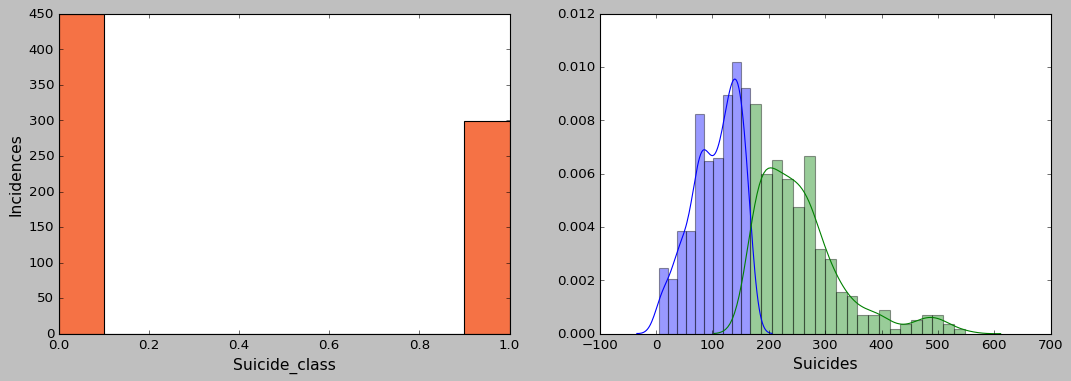

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.hist(total.suicide_class, color=col[4],bins=10)
plt.ylabel('Incidences', fontsize=14)
plt.xlabel('Suicide_class', fontsize=14)

plt.subplot(122)
sns.distplot(total.Suicides[total.suicide_class == 0], bins=10)
sns.distplot(total.Suicides[total.suicide_class == 1], bins=20)  
plt.xlabel('Suicides', fontsize=14)

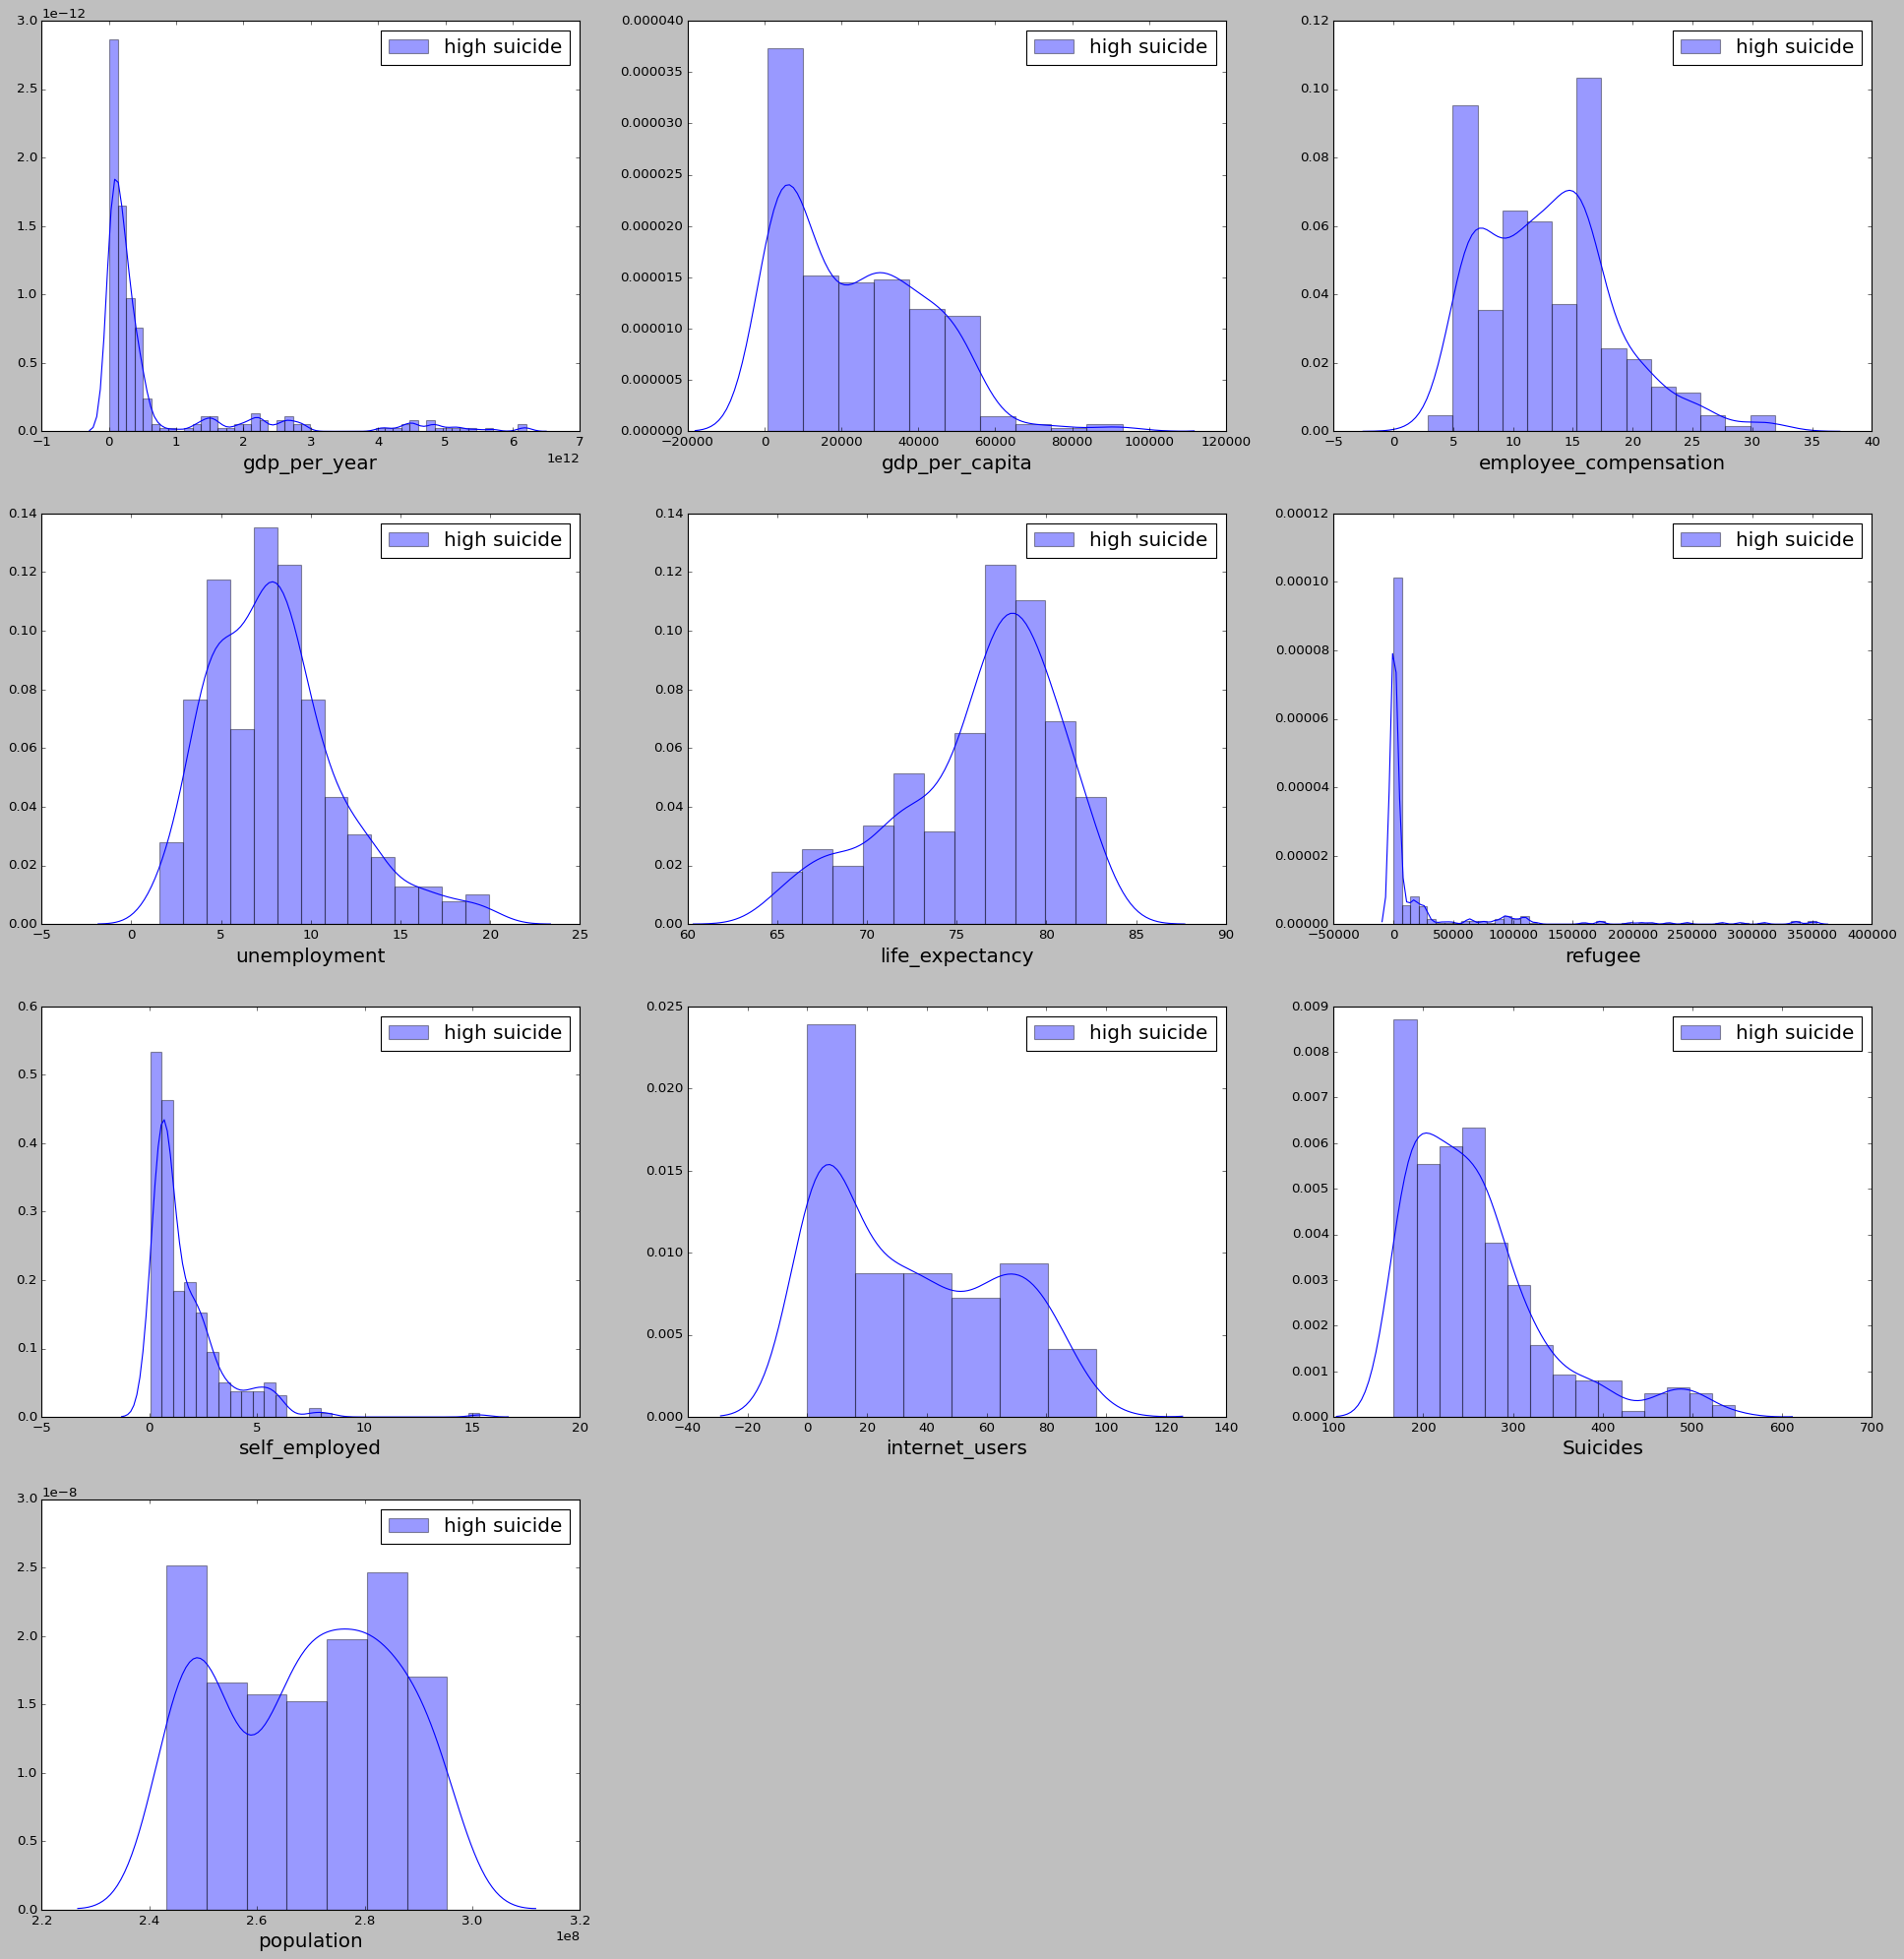

In [ ]:
fig = plt.figure(figsize=(30, 30))

j = 0
for i, x in enumerate(total.columns[1:11]):
    plt.subplot(4, 3, j+1)
    j += 1
    sns.distplot(total[x][total.suicide_class == 1], label='high suicide')       
    plt.legend(loc='best', fontsize=18)  
    plt.xlabel(x, fontsize=18)

In [ ]:
#checking for any categorical column
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 0 to 748
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   749 non-null    int64  
 1   gdp_per_year           749 non-null    float64
 2   gdp_per_capita         749 non-null    int64  
 3   employee_compensation  749 non-null    float64
 4   unemployment           749 non-null    float64
 5   life_expectancy        749 non-null    float64
 6   refugee                749 non-null    float64
 7   self_employed          749 non-null    float64
 8   internet_users         749 non-null    float64
 9   Suicides               749 non-null    float64
 10  population             749 non-null    float64
 11  country                749 non-null    object 
 12  suicide_class          749 non-null    int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 81.9+ KB


In [ ]:
#Encoding categorical country column

from sklearn.preprocessing import LabelEncoder

total['country'] = LabelEncoder().fit_transform(total['country'])  # Alphabetic order 0-->39
total.country.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [ ]:
#Preparing pd columns to feature and label array
feature_X = np.asarray(total[totalfeatures])
label_y = np.asarray(total['suicide_class'])


print(feature_X[0:10])

[[0.00000000e+00 1.99500000e+03 2.58032000e+11 8.23200000e+03
  1.72434470e+01 1.87999992e+01 7.26510000e+01 3.30000000e+02
  1.40900004e+00 8.62770810e-02 2.43164200e+08]
 [0.00000000e+00 1.99600000e+03 2.72150000e+11 8.56300000e+03
  1.64010370e+01 1.71100006e+01 7.28430000e+01 2.17000000e+02
  1.66499996e+00 1.41954704e-01 2.45997800e+08]
 [0.00000000e+00 1.99700000e+03 2.92859000e+11 9.05700000e+03
  1.64121400e+01 1.48199997e+01 7.30290000e+01 1.59000000e+02
  1.54100001e+00 2.80339882e-01 2.48486400e+08]
 [0.00000000e+00 1.99800000e+03 2.98948000e+11 9.12600000e+03
  1.50147549e+01 1.26499996e+01 7.32130000e+01 1.42000000e+02
  1.32599997e+00 8.30766680e-01 2.51332500e+08]
 [0.00000000e+00 1.99900000e+03 2.83523000e+11 8.54600000e+03
  1.50785091e+01 1.40500002e+01 7.33960000e+01 5.86000000e+02
  1.35500002e+00 3.28448196e+00 2.53748671e+08]
 [0.00000000e+00 2.00000000e+03 2.84204000e+11 8.46200000e+03
  1.46946992e+01 1.50000000e+01 7.35760000e+01 6.09000000e+02
  1.15400004e+00

In [ ]:
# Applying standard scaler on data to make it normally distributed
X_scaled = StandardScaler().fit(feature_X).transform(feature_X)
print(X_scaled[0:10])

[[-1.69087503 -1.64340661 -0.38208824 -0.78055847  0.24532946  2.01426715
  -0.65021348 -0.26799586 -0.341628   -1.21383508 -1.73961011]
 [-1.69087503 -1.46110336 -0.3678945  -0.76427316  0.12545112  1.68367168
  -0.61385875 -0.26993681 -0.2926939  -1.21197812 -1.56418092]
 [-1.69087503 -1.27880011 -0.34707439 -0.7399682   0.12703111  1.23570448
  -0.57864009 -0.27093305 -0.31639635 -1.20736269 -1.41011081]
 [-1.69087503 -1.09649686 -0.34095273 -0.73657338 -0.07182241  0.8112117
  -0.54380014 -0.27122506 -0.35749338 -1.18900485 -1.23390774]
 [-1.69087503 -0.9141936  -0.35646048 -0.76510957 -0.06274993  1.08507811
  -0.50914953 -0.26359865 -0.35195005 -1.10716852 -1.08432173]
 [-1.69087503 -0.73189035 -0.35577583 -0.76924239 -0.11736763  1.27091592
  -0.47506696 -0.26320358 -0.39037097 -0.98195836 -0.55824236]
 [-1.69087503 -0.5495871  -0.37136602 -0.79689297 -0.18225547  1.72475144
  -0.44117374 -0.26234475 -0.40222221 -0.89050301 -0.3612784 ]
 [-1.69087503 -0.36728385 -0.54325626 -1.0

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, label_y, test_size=0.3, random_state=42)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (524, 11) (524,)
Test set: (225, 11) (225,)


# Model development 
 We will be implementing our model using different ensemble model, and compare them to determine which gives the better result
The models used are
 1. Xgboost 
 2. Decision Tree 
 3. Random Forrest
 4. Logistic Regression


[0]	validation_0-error:0.166031	validation_1-error:0.146667
[1]	validation_0-error:0.14313	validation_1-error:0.151111
[2]	validation_0-error:0.131679	validation_1-error:0.133333
[3]	validation_0-error:0.116412	validation_1-error:0.12
[4]	validation_0-error:0.091603	validation_1-error:0.128889
[5]	validation_0-error:0.089695	validation_1-error:0.115556
[6]	validation_0-error:0.097328	validation_1-error:0.137778
[7]	validation_0-error:0.070611	validation_1-error:0.12
[8]	validation_0-error:0.072519	validation_1-error:0.124444
[9]	validation_0-error:0.068702	validation_1-error:0.111111
[10]	validation_0-error:0.066794	validation_1-error:0.106667
[11]	validation_0-error:0.074427	validation_1-error:0.137778
[12]	validation_0-error:0.078244	validation_1-error:0.137778
[13]	validation_0-error:0.072519	validation_1-error:0.137778
[14]	validation_0-error:0.076336	validation_1-error:0.142222
[15]	validation_0-error:0.080153	validation_1-error:0.137778
[16]	validation_0-error:0.078244	validation

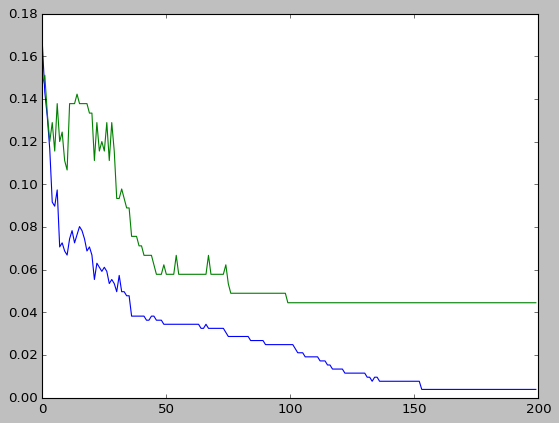

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb


xgb_model = xgb.XGBClassifier(objective="binary:logistic",
                              n_estimators=200, random_state=42)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the classifier to the training set
xgb_model.fit(X_train, y_train, eval_metric=["error"], eval_set=eval_set, verbose=True)
results = xgb_model.evals_result()

# Predict the labels of the test set: preds
predictions = xgb_model.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(predictions == y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy*100))

# plot classification error
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')

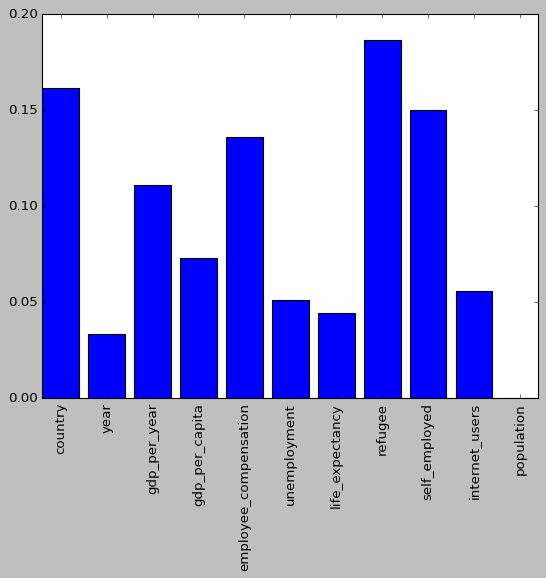

In [ ]:
plt.bar(x=totalfeatures,height=xgb_model.feature_importances_)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
xgboost_importance = pd.DataFrame([totalfeatures,  xgb_model.feature_importances_]).T #ap

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


tree = DecisionTreeClassifier(criterion="entropy", max_depth=10, max_leaf_nodes=21)
tree = tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(y_pred)
print('******************Decision Tree classifier**************')

print('Accuracy =', tree.score(X_test, y_test))
print('Train Accuracy=', tree.score(X_train, y_train))
print('CM\n', confusion_matrix(y_test, y_pred))
print('classification report for decision tree\n', classification_report(y_test, y_pred))
print('# of leaves', tree.get_n_leaves(), '\n Depth', tree.get_depth())



tree_feat_importance = pd.DataFrame([totalfeatures, tree.feature_importances_]).T


print(tree_feat_importance.sort_values(by=1, ascending=False))
print('\n# of features= ', tree.n_features_)

[1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1
 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0
 1 1 1]
******************Decision Tree classifier**************
Accuracy = 0.8933333333333333
Train Accuracy= 0.9618320610687023
CM
 [[111  15]
 [  9  90]]
classification report for decision tree
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       126
           1       0.86      0.91      0.88        99

    accuracy                           0.89       225
   macro avg       0.89      0.90      0.89       225
weighted avg       0.90      0.89      0.89       225

# of leaves 21 
 Depth 8


In [ ]:
#RandomForrestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score

#model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
#model.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
rffeat_importance = random_forest.feature_importances_
rffeat_importance = pd.DataFrame([totalfeatures, random_forest.feature_importances_]).T
print("Model accuracy is: {0:.2f}".format(accuracy_score(y_test, y_pred) * 100))

print('******************Random forest classifier**************')
print('Accuracy on training data', random_forest.score(X_train, y_train))
print('Accuracy on test data', random_forest.score(X_test, y_test))
print('CM\n', confusion_matrix(y_test, y_pred))
print('Classification report for random forest\n', classification_report(y_test, y_pred))
print(rffeat_importance.sort_values(by=1, ascending=False))

Model accuracy is: 95.56
******************Random forest classifier**************
Accuracy on training data 1.0
Accuracy on test data 0.9555555555555556
CM
 [[122   4]
 [  6  93]]
Classification report for random forest
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       126
           1       0.96      0.94      0.95        99

    accuracy                           0.96       225
   macro avg       0.96      0.95      0.95       225
weighted avg       0.96      0.96      0.96       225

                        0          1
0                 country   0.162861
7                 refugee   0.155721
8           self_employed   0.146779
4   employee_compensation   0.136303
2            gdp_per_year    0.11515
3          gdp_per_capita  0.0835747
6         life_expectancy  0.0703124
5            unemployment  0.0466492
9          internet_users  0.0376858
1                    year  0.0233839
10             population  0.0215805


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=0.8, solver='liblinear').fit(X_train, y_train)

y_pred = logistic.predict(X_test)

yhat_prob = logistic.predict_proba(X_test)
print("Model accuracy is: {0:.2f}".format(logistic.score(X_test, y_test)))
print("Training accuracy is: {0:.2f}".format(logistic.score(X_train, y_train)))

print('precision_recall_fscore_support', precision_recall_fscore_support(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
print('\n confusion matrix \n', cm)

print('classification report for Logistic Regression\n', classification_report(y_test, yhat))

Model accuracy is: 0.75
Training accuracy is: 0.75
precision_recall_fscore_support (0.7502052785923754, 0.7511111111111111, 0.7501162790697674, None)

 confusion matrix 
 [[101  25]
 [ 31  68]]
classification report for Logistic Regression
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       126
           1       0.73      0.69      0.71        99

    accuracy                           0.75       225
   macro avg       0.75      0.74      0.75       225
weighted avg       0.75      0.75      0.75       225



In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=20, max_depth=10, min_samples_split=2, min_samples_leaf=5,
                                       max_leaf_nodes=20, max_features=len(totalfeatures)) 

random_forest.fit(X_train, y_train)

yrfhat = random_forest.predict(X_test)
feat_importance = random_forest.feature_importances_
rffeat_importance = pd.DataFrame([totalfeatures, random_forest.feature_importances_]).T

print('******************Random forest classifier**************')
print('Accuracy on training data', random_forest.score(X_train, y_train))
print('Accuracy on test data', random_forest.score(X_test, y_test))
print('CM\n', confusion_matrix(y_test, yrfhat))
print('Classification report for random forest\n', classification_report(y_test, yrfhat))
print(rffeat_importance.sort_values(by=1, ascending=False))

******************Random forest classifier**************
Accuracy on training data 0.9618320610687023
Accuracy on test data 0.9377777777777778
CM
 [[122   4]
 [ 10  89]]
Classification report for random forest
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       126
           1       0.96      0.90      0.93        99

    accuracy                           0.94       225
   macro avg       0.94      0.93      0.94       225
weighted avg       0.94      0.94      0.94       225

                        0           1
8           self_employed     0.21551
4   employee_compensation    0.201633
7                 refugee    0.171783
0                 country    0.166356
2            gdp_per_year    0.126598
3          gdp_per_capita   0.0354275
5            unemployment   0.0312412
9          internet_users   0.0267043
6         life_expectancy    0.018621
10             population  0.00327693
1                    year  0.00284917


# Classification performance comparison/ROC plot

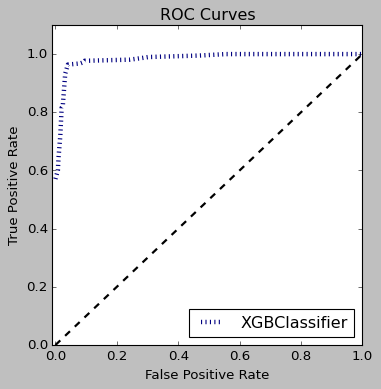

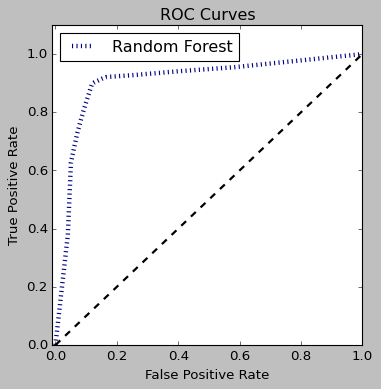

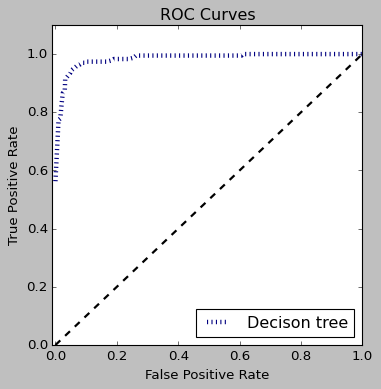

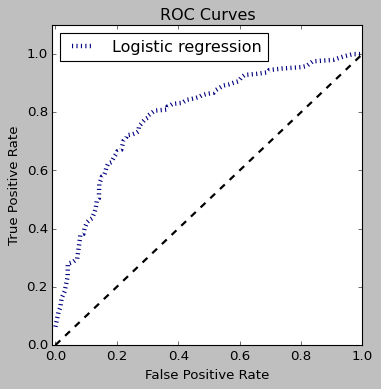

In [ ]:
models = [xgb_model, tree, random_forest,logistic ]
modelnames = ['XGBClassifier', 'Random Forest', 'Decison tree', 'Logistic regression']


for i, x in enumerate(models):
    
    y_true = y_test
    y_probas = x.predict_proba(X_test)
    ax1 = skplt.metrics.plot_roc(y_true, y_probas, plot_micro=False, plot_macro=True, classes_to_plot=[], figsize=(5, 5))
    plt.axis((-0.01, 1, 0, 1.1))
    plt.legend([modelnames[i]], loc='best')

# k-fold cross validation

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

['LReg', 'xgb', 'Dtree', 'r_forest']
[72.3512336719884, 94.27793904208997, 88.74818577648766, 93.90058055152394]


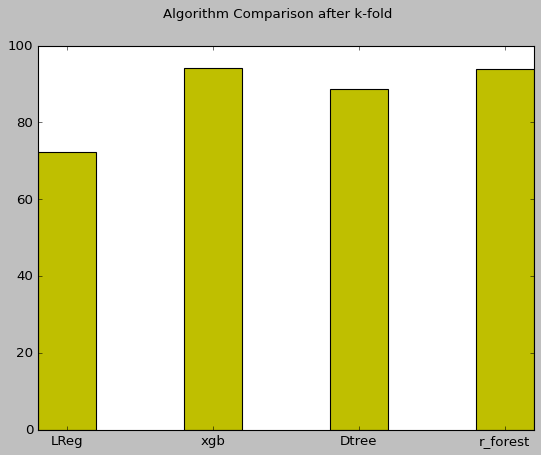

In [ ]:
# cross var comparision score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

seed = 42
models1 = []
models1.append(('LReg', logistic))
models1.append(('xgb', xgb_model))
models1.append(('Dtree', tree))
models1.append(('r_forest', random_forest))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models1:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results.mean()*100)
	names.append(name)

fig = plt.figure()
fig.suptitle('Algorithm Comparison after k-fold')
plt.bar(names, results, color='y', width =0.4)
print(names)
print(results)

In [ ]:
mscoresL = []

for name,model in models1:
    mscores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    
    mpredictions = cross_val_predict(model, X_train, y_train)
    print('\n****************************'+name)
    print(mscores)
    #get the mean of each fold 
    mscoresL.append(mscores.mean())
    print("Mean Accuracy of Model with Cross Validation is:",mscores.mean() * 100)

    print('CM for 10 fold cross validation\n', confusion_matrix(y_train, mpredictions))
    print('classification report for models with CV \n', classification_report(y_train, mpredictions))


****************************LReg
[0.73584906 0.64150943 0.75471698 0.66037736 0.69230769 0.73076923
 0.76923077 0.73076923 0.75       0.75      ]
Mean Accuracy of Model with Cross Validation is: 72.15529753265602
CM for 10 fold cross validation
 [[260  64]
 [ 90 110]]
classification report for models with CV 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77       324
           1       0.63      0.55      0.59       200

    accuracy                           0.71       524
   macro avg       0.69      0.68      0.68       524
weighted avg       0.70      0.71      0.70       524


****************************xgb
[0.9245283  0.98113208 0.96226415 0.9245283  0.98076923 0.94230769
 0.94230769 0.90384615 0.96153846 0.98076923]
Mean Accuracy of Model with Cross Validation is: 95.0399129172714
CM for 10 fold cross validation
 [[312  12]
 [ 19 181]]
classification report for models with CV 
               precision    recall  f1-score   sup

# Feature importance results summary

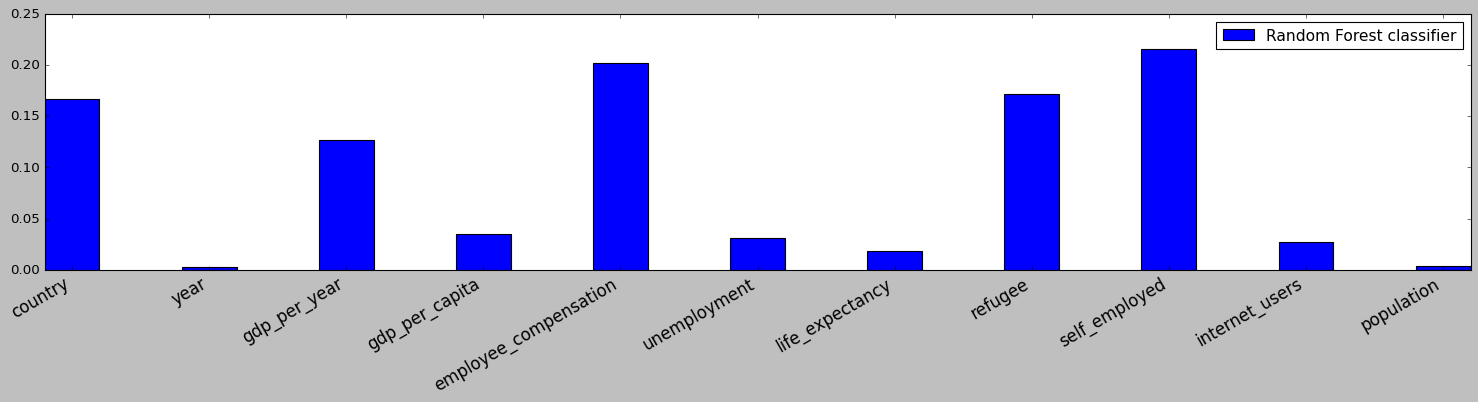

In [ ]:
plt.figure(figsize=(23, 4))
plt.bar(rffeat_importance[0], rffeat_importance[1], color='b', width=0.4,)
plt.xticks(ha='right', rotation=30, fontsize=15)
plt.legend(['Random Forest classifier'], fontsize=14)




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

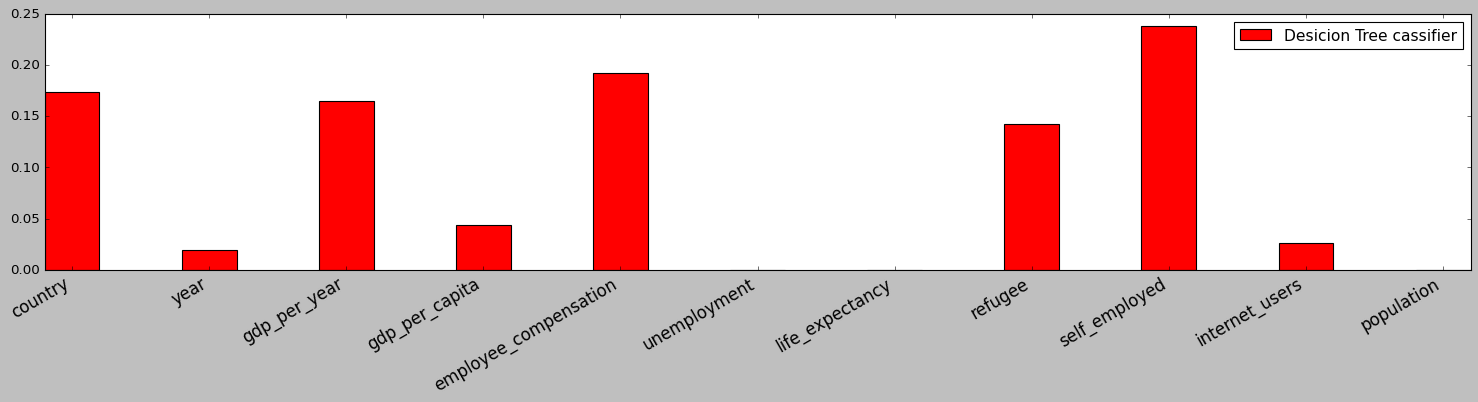

In [ ]:
plt.figure(figsize=(23, 4))
plt.bar(tree_feat_importance[0], tree_feat_importance[1], color='r', width=0.4)
plt.legend(['Desicion Tree cassifier'], fontsize=14)
plt.xticks(ha='right', rotation=30, fontsize=15)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

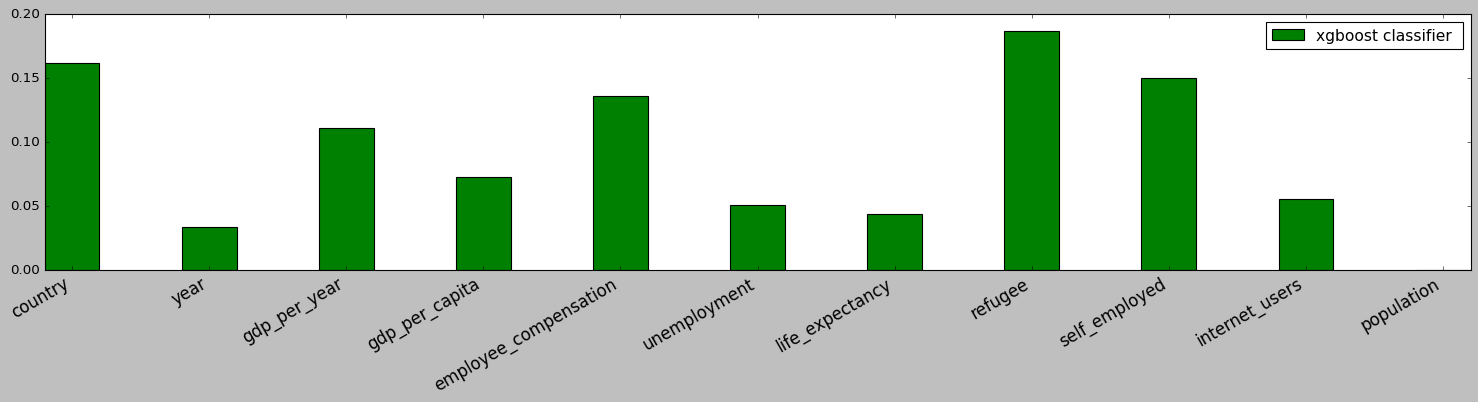

In [ ]:
#xgboost

plt.figure(figsize=(23, 4))
plt.bar(xgboost_importance[0], xgboost_importance[1], color='g', width=0.4,)
plt.xticks(ha='right', rotation=30, fontsize=15)
plt.legend(['xgboost classifier '],fontsize=14)
plt.xticks(ha='right', rotation=30, fontsize=15)